---------------------------------------------

## Linear maps quantum implementation

### $L_0:$

C:\Users\CSSC\AppData\Local\Temp\ipykernel_16368\286447180.py:51: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  qubits = [qubit._index for qubit in gate[1]]


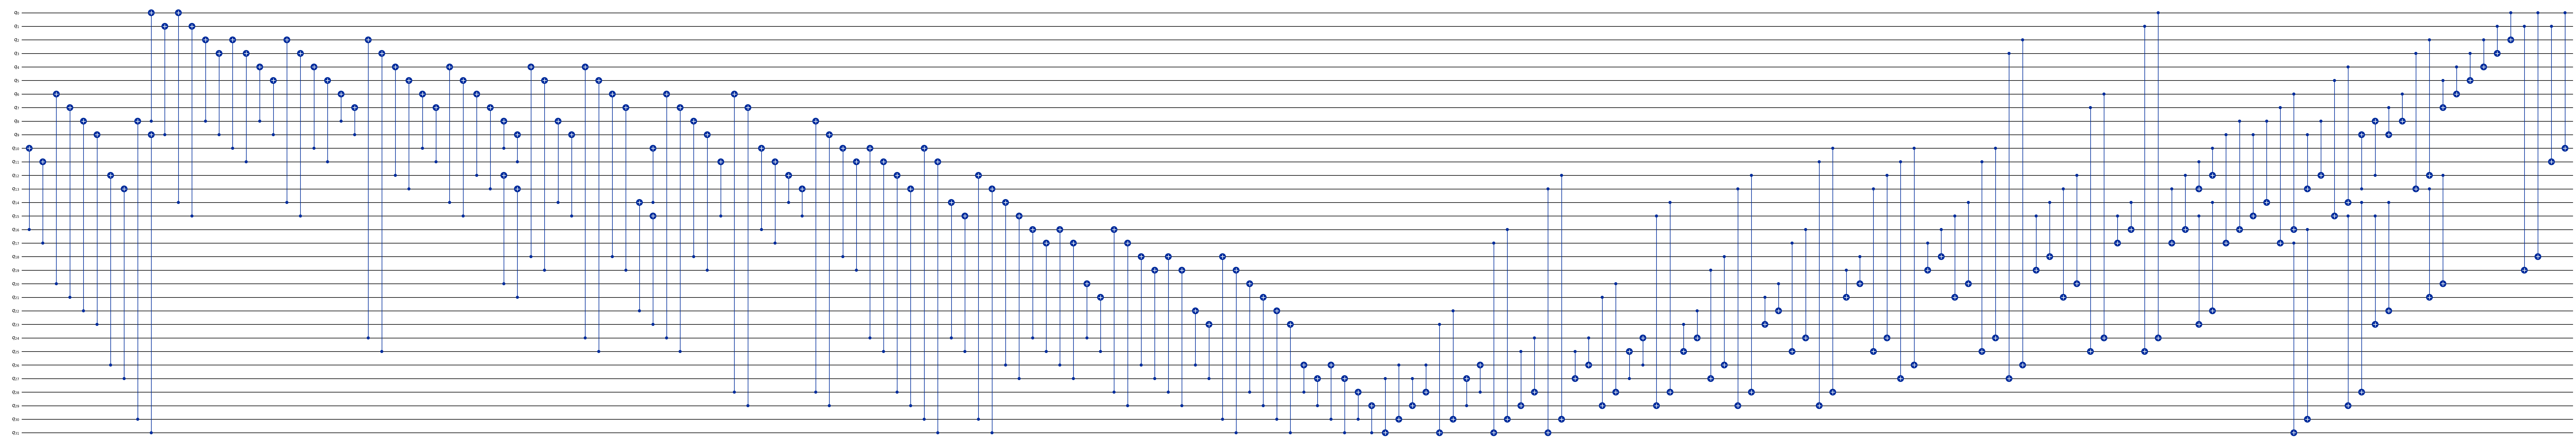

In [184]:
import numpy as np
from qiskit import QuantumCircuit

def cnot_synth(L1, n, m):
    """
    Implements the C-NOT Circuit Synthesis algorithm for a given linear transformation matrix L1.

    Parameters:
    L1: The linear transformation matrix.
    n: The number of qubits.
    m: The block size in the matrix.
    """
    def lwr_cnot_synth(L1, n, m):
        qc = QuantumCircuit(n)
        for sec in range(1, int(np.ceil(n / m)) + 1):
            patt = {}
            for row in range((sec - 1) * m, n):
                sub_row_patt = tuple(L1[row, (sec - 1) * m:sec * m])
                if sub_row_patt in patt:
                    L1[row, :] = np.bitwise_xor(L1[row, :], L1[patt[sub_row_patt], :])
                    qc.cx(patt[sub_row_patt], row)
                else:
                    patt[sub_row_patt] = row

            for col in range((sec - 1) * m, min(sec * m, n)):
                if L1[col, col] == 0:
                    for row in range(col + 1, n):
                        if L1[row, col] == 1:
                            L1[col, :] = np.bitwise_xor(L1[col, :], L1[row, :])
                            qc.cx(row, col)
                            break

                for row in range(col + 1, n):
                    if L1[row, col] == 1:
                        L1[row, :] = np.bitwise_xor(L1[row, :], L1[col, :])
                        qc.cx(col, row)

        return L1, qc

    # Lower triangular synthesis
    L1, qc_l = lwr_cnot_synth(L1, n, m)
    
    # Transpose for upper triangular synthesis
    L1 = L1.T
    L1, qc_u = lwr_cnot_synth(L1, n, m)
    
    
    # Reverse qc_u and switch control/target
    qc_u_reverse = QuantumCircuit(n)
    for gate in reversed(qc_u.data):
        qubits = [qubit._index for qubit in gate[1]]
        qc_u_reverse.cx(qubits[1], qubits[0])

    # Combine circuits
    #final_qc = qc_u_reverse.inverse() + qc_l.inverse()
    final_qc = qc_u_reverse.inverse().compose(qc_l.inverse())
    

    return final_qc

n = 32  # Number of rows and columns
m = 10  # Block size for column sections
L1 = np.array(
    [[1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0],
    [0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1]])

# Generate the quantum circuit using CNOT gates
qc = cnot_synth(L1, n, m)
qc.draw(output='mpl',fold=-1)  # Print the circuit

In [186]:
print(dict(qc.count_ops())) # Print the CNOT count of the circuit
print(qc.depth())

{'cx': 202}
46


### $L_1:$

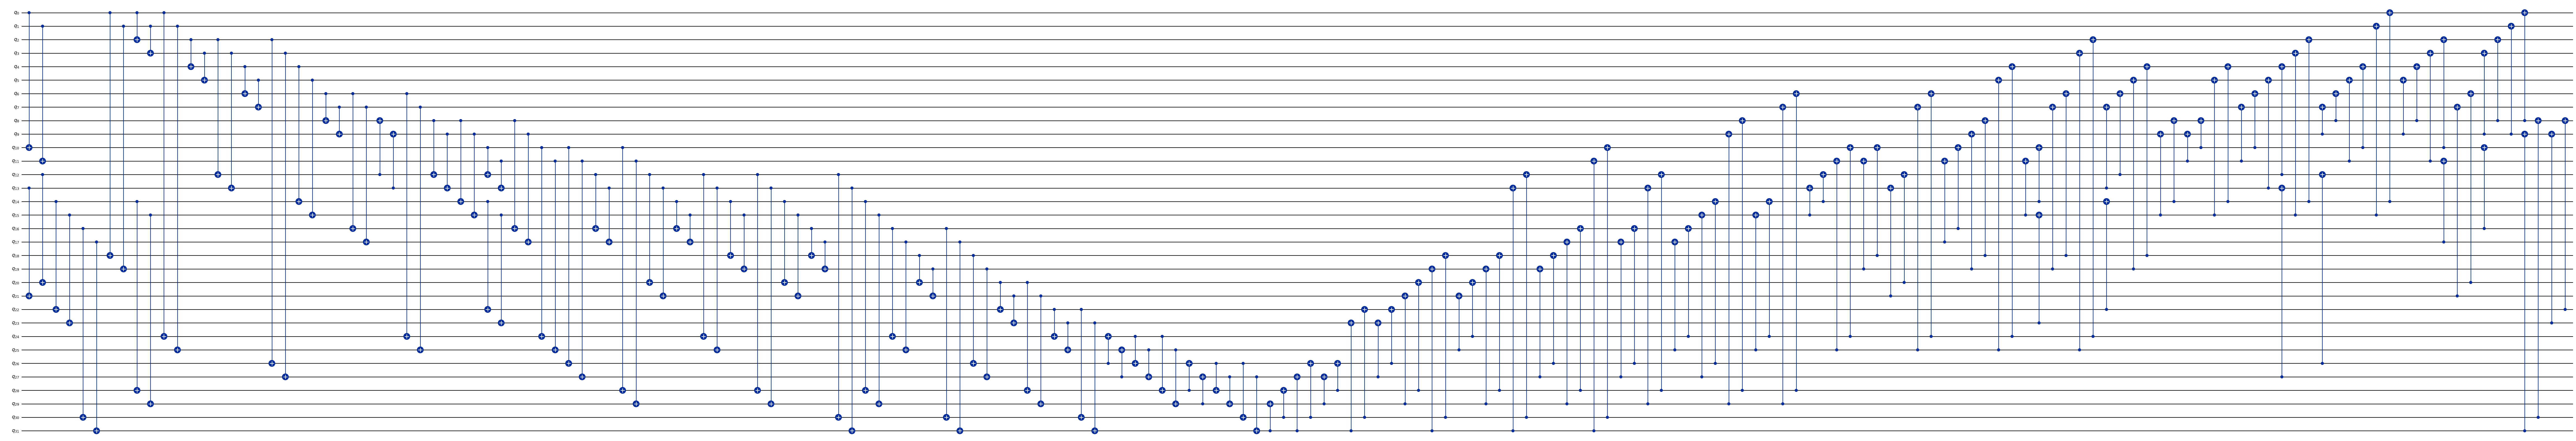

In [189]:
qc.inverse().draw(output='mpl',fold=-1)

In [191]:
print(dict(qc.inverse().count_ops()))
print(qc.inverse().depth())

{'cx': 202}
46


---------------------------

## S-box Implementation using MMD method

### $S_0:$

In [529]:
table = input('Enter: ')
s0 = table.split()

Enter:  3E 72 5B 47 CA E0 00 33 04 D1 54 98 09 B9 6D CB 7B 1B F9 32 AF 9D 6A A5 B8 2D FC 1D 08 53 03 90 4D 4E 84 99 E4 CE D9 91 DD B6 85 48 8B 29 6E AC CD C1 F8 1E 73 43 69 C6 B5 BD FD 39 63 20 D4 38 76 7D B2 A7 CF ED 57 C5 F3 2C BB 14 21 06 55 9B E3 EF 5E 31 4F 7F 5A A4 0D 82 51 49 5F BA 58 1C 4A 16 D5 17 A8 92 24 1F 8C FF D8 AE 2E 01 D3 AD 3B 4B DA 46 EB C9 DE 9A 8F 87 D7 3A 80 6F 2F C8 B1 B4 37 F7 0A 22 13 28 7C CC 3C 89 C7 C3 96 56 07 BF 7E F0 0B 2B 97 52 35 41 79 61 A6 4C 10 FE BC 26 95 88 8A B0 A3 FB C0 18 94 F2 E1 E5 E9 5D D0 DC 11 66 64 5C EC 59 42 75 12 F5 74 9C AA 23 0E 86 AB BE 2A 02 E7 67 E6 44 A2 6C C2 93 9F F1 F6 FA 36 D2 50 68 9E 62 71 15 3D D6 40 C4 E2 0F 8E 83 77 6B 25 05 3F 0C 30 EA 70 B7 A1 E8 A9 65 8D 27 1A DB 81 B3 A0 F4 45 7A 19 DF EE 78 34 60


In [531]:
a=[]
for i in s0:
    a.append("{0:08b}".format(int(i, 16)))

In [533]:
TT = []
for i in range(len(a)):
    TT.append([int(bit) for bit in a[i]])

In [535]:
lst = [f'{i:08b}' for i in range(256)]
Tab = []
for i in range(len(lst)):
    Tab.append([int(bit) for bit in lst[i]])

In [537]:
import math
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [539]:
def apply_toffoli(circuit, controls, target):
    """
    Apply a Toffoli gate to the circuit.
    Args:
        circuit: QuantumCircuit object
        controls: List of control qubit indices
        target: Target qubit index
    """
    if len(controls) == 1:
        circuit.cx(controls[0], target)
    elif len(controls) > 1:
        circuit.mcx(controls, target)

In [541]:
TT = []
for i in range(len(a)):
    TT.append([int(bit) for bit in a[i]])

n = 8
qc = QuantumCircuit(n, n)

for i in range(n):
    if TT[0][i]==1:
        qc.x(n-1-i)
        for j in range(2**n):
            TT[j][i]=(TT[j][i]+1)%2
mult=1
# p=0
for i in range(1,2**n):
    for j in range(n-1,-1,-1):
        if TT[i][j]!=Tab[i][j]:
            # Flip the target bit using appropriate controls
            controls = [n-k-1 for k in range(0,j) if TT[i][k] == 1 and k!=j]
            if len(controls)==0 or TT[i-1][0:j]==TT[i][0:j]:
                controls = [n-k-1 for k in range(n) if TT[i][k] == 1 and k!=j]
            apply_toffoli(qc, controls, n-1-j)
#             if len(controls)>=8:
#                 p=p+1
            for l in range(2**n):
                for m in range(len(controls)):
                    mult = mult * TT[l][n-controls[m]-1]
                if mult == 1:
                    TT[l][j]= (TT[l][j]+1)%2
                else:
                    mult = 1

qc = qc.inverse()
qc.barrier()
qc.measure(range(n),range(n))
qc.draw(fold=-1)
# print(p)

┌───┐     ┌───┐          ┌───┐     ┌───┐     ┌───┐                              ┌───┐     ┌───┐     ┌───┐          ┌───┐               ┌───┐                    ┌───┐                    ┌───┐          ┌───┐               ┌───┐     ┌───┐                              ┌───┐                    ┌───┐                              ┌───┐                    ┌───┐               ┌───┐               ┌───┐     ┌───┐               ┌───┐               ┌───┐                                   ┌───┐                              ┌───┐                    ┌───┐                    ┌───┐                              ┌───┐                         ┌───┐                                   ┌───┐                    ┌───┐                                   ┌───┐               ┌───┐          ┌───┐┌───┐                         ┌───┐                                                                                               ┌───┐                                             ┌───┐               ┌───┐          ┌───┐                    ┌───┐     ┌───┐                         ┌───┐                    ┌───┐                                   ┌───┐                                   ┌───┐                                        ┌───┐                                                            ┌───┐                                             ┌───┐                    ┌───┐                         ┌───┐               ┌───┐                         ┌───┐                                             ┌───┐                         ┌───┐                    ┌───┐                    ┌───┐               ┌───┐                    ┌───┐               ┌───┐               ┌───┐               ┌───┐                                             ┌───┐                    ┌───┐                    ┌───┐               ┌───┐          ┌───┐                    ┌───┐                    ┌───┐               ┌───┐                    ┌───┐                              ┌───┐                    ┌───┐          ┌───┐                         ┌───┐               ┌───┐                                                                                ┌───┐                                                       ┌───┐                    ┌───┐                                   ┌───┐          ┌───┐                    ┌───┐               ┌───┐                         ┌───┐                    ┌───┐                    ┌───┐                    ┌───┐                                   ┌───┐                                                            ┌───┐          ┌───┐                                             ┌───┐                                   ┌───┐                                                                                               ┌───┐     ┌───┐                         ┌───┐                                                                 ┌───┐                                             ┌───┐                    ┌───┐                                   ┌───┐                              ┌───┐                                                                 ┌───┐                         ┌───┐               ┌───┐                                                                                                         ┌───┐               ┌───┐                                                       ┌───┐          ┌───┐                                                  ┌───┐     ┌───┐                         ┌───┐               ┌───┐                    ┌───┐                                                       ┌───┐                         ┌───┐                         ┌───┐          ┌───┐                              ┌───┐                                             ┌───┐          ┌───┐                                                                 ┌───┐                                                       ┌───┐          ┌───┐                                                                                ┌───┐     ┌───┐                                                  ┌───┐                    ┌───┐               

In [329]:
# backend = Aer.get_backend('qasm_simulator')
# l = []
# for i in range(0, 2**n):
#     qc1 = QuantumCircuit(n,n)

#     # Convert i to binary and apply X gate where the bit is 1
#     for bit in range(n):
#         if (i >> bit) & 1:  # Check if the bit is set (1)
#             qc1.x(bit)  # Apply X gate to the corresponding qubit
#     qc1 = qc1.compose(qc)
#     qc1.measure(range(n),range(n))
    
#     result = backend.run(transpile(qc1, backend), shots=1).result()
#     #print(result.get_counts(qc1))
#     counts = result.get_counts(qc1)
#     l.append(list(counts.keys())[0])
#     #print(qc1.draw())
# #l
# obs = []
# for i in range(len(l)):
#     obs.append([int(bit) for bit in l[i]])
# obs

In [327]:
# for i in range(2**n):
#     print (obs[i] , TT[i])

In [543]:
print(dict(qc.count_ops()))

{'mcx': 637, 'ccx': 199, 'cx': 102, 'measure': 8, 'x': 5, 'barrier': 1}


In [545]:
print("Circuit depth: ", qc.depth())

Circuit depth:  936


{'00111110': 1024}


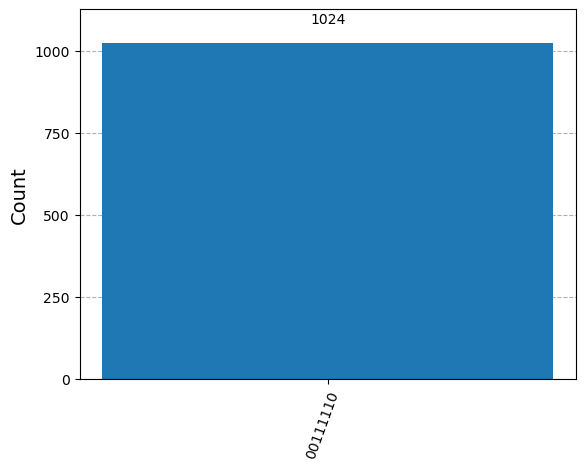

In [547]:
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(qc, backend), shots=1024).result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

-------------------

### $S_1:$

In [549]:
table = input('Enter: ')
s1 = table.split()

Enter:  55 C2 63 71 3B C8 47 86 9F 3C DA 5B 29 AA FD 77 8C C5 94 0C A6 1A 13 00 E3 A8 16 72 40 F9 F8 42 44 26 68 96 81 D9 45 3E 10 76 C6 A7 8B 39 43 E1 3A B5 56 2A C0 6D B3 05 22 66 BF DC 0B FA 62 48 DD 20 11 06 36 C9 C1 CF F6 27 52 BB 69 F5 D4 87 7F 84 4C D2 9C 57 A4 BC 4F 9A DF FE D6 8D 7A EB 2B 53 D8 5C A1 14 17 FB 23 D5 7D 30 67 73 08 09 EE B7 70 3F 61 B2 19 8E 4E E5 4B 93 8F 5D DB A9 AD F1 AE 2E CB 0D FC F4 2D 46 6E 1D 97 E8 D1 E9 4D 37 A5 75 5E 83 9E AB 82 9D B9 1C E0 CD 49 89 01 B6 BD 58 24 A2 5F 38 78 99 15 90 50 B8 95 E4 D0 91 C7 CE ED 0F B4 6F A0 CC F0 02 4A 79 C3 DE A3 EF EA 51 E6 6B 18 EC 1B 2C 80 F7 74 E7 FF 21 5A 6A 54 1E 41 31 92 35 C4 33 07 0A BA 7E 0E 34 88 B1 98 7C F3 3D 60 6C 7B CA D3 1F 32 65 04 28 64 BE 85 9B 2F 59 8A D7 B0 25 AC AF 12 03 E2 F2


In [551]:
b=[]
for i in s1:
    b.append("{0:08b}".format(int(i, 16)))

In [553]:
TT1 = []
for i in range(len(b)):
    TT1.append([int(bit) for bit in b[i]])

In [555]:
TT1 = []
for i in range(len(b)):
    TT1.append([int(bit) for bit in b[i]])

n = 8
qc1 = QuantumCircuit(n, n)

for i in range(n):
    if TT1[0][i]==1:
        qc1.x(n-1-i)
        for j in range(2**n):
            TT1[j][i]=(TT1[j][i]+1)%2
mult=1
#p=0
for i in range(1,2**n):
    for j in range(n-1,-1,-1):
        if TT1[i][j]!=Tab[i][j]:
            # Flip the target bit using appropriate controls
            controls = [n-k-1 for k in range(0,j) if TT1[i][k] == 1 and k!=j]
            if len(controls)==0 or TT1[i-1][0:j]==TT1[i][0:j]:
                controls = [n-k-1 for k in range(n) if TT1[i][k] == 1 and k!=j]
            apply_toffoli(qc1, controls, n-1-j)
#             if len(controls)>=7:
#                 p=p+1
            for l in range(2**n):
                for m in range(len(controls)):
                    mult = mult * TT1[l][n-controls[m]-1]
                if mult == 1:
                    TT1[l][j]= (TT1[l][j]+1)%2
                else:
                    mult = 1
        #print(TT[0:5])
    if TT1[0:i]!= Tab[0:i]:
        print(i)
        break

qc1 = qc1.inverse()
qc1.barrier()
qc1.measure(range(n),range(n))
qc1.draw(fold=-1)
#print(p)

┌───┐          ┌───┐     ┌───┐                    ┌───┐          ┌───┐          ┌───┐          ┌───┐                                        ┌───┐               ┌───┐                                                                 ┌───┐                                                  ┌───┐                                                                 ┌───┐                         ┌───┐     ┌───┐                    ┌───┐                    ┌───┐                              ┌───┐          ┌───┐               ┌───┐                    ┌───┐     ┌───┐          ┌───┐               ┌───┐                                                  ┌───┐          ┌───┐               ┌───┐          ┌───┐                                                  ┌───┐               ┌───┐                         ┌───┐          ┌───┐          ┌───┐     ┌───┐                    ┌───┐                                                                 ┌───┐                                             ┌───┐                         ┌───┐                                                                      ┌───┐                                                                                                    ┌───┐                              ┌───┐                                                                                                         ┌───┐                    ┌───┐                                        ┌───┐                    ┌───┐                         ┌───┐                    ┌───┐               ┌───┐                    ┌───┐                    ┌───┐               ┌───┐               ┌───┐                    ┌───┐                                                                                ┌───┐                    ┌───┐                                                            ┌───┐                                        ┌───┐                                   ┌───┐                    ┌───┐                    ┌───┐               ┌───┐                         ┌───┐                                                                                                              ┌───┐                                                       ┌───┐                                                                                     ┌───┐                    ┌───┐               ┌───┐                                                                 ┌───┐                                   ┌───┐                                                                      ┌───┐               ┌───┐                    ┌───┐               ┌───┐                                                                                                                   ┌───┐                              ┌───┐                                                                 ┌───┐                    ┌───┐                                                                                               ┌───┐                    ┌───┐                                   ┌───┐          ┌───┐                                   ┌───┐                              ┌───┐                                                            ┌───┐                                                                           ┌───┐          ┌───┐                    ┌───┐                         ┌───┐                         ┌───┐                    ┌───┐                                                       ┌───┐          ┌───┐                    ┌───┐                              ┌───┐                         ┌───┐                              ┌───┐                    ┌───┐                                        ┌───┐                                                                                                                   ┌───┐               ┌───┐                    ┌───┐                                                                                                    ┌───┐                                                                                                                   ┌───┐                    

In [557]:
print(dict(qc1.count_ops()))

{'mcx': 613, 'ccx': 211, 'cx': 110, 'measure': 8, 'x': 4, 'barrier': 1}


In [559]:
print("Circuit depth: ", qc1.depth())

Circuit depth:  930


{'01010101': 1024}


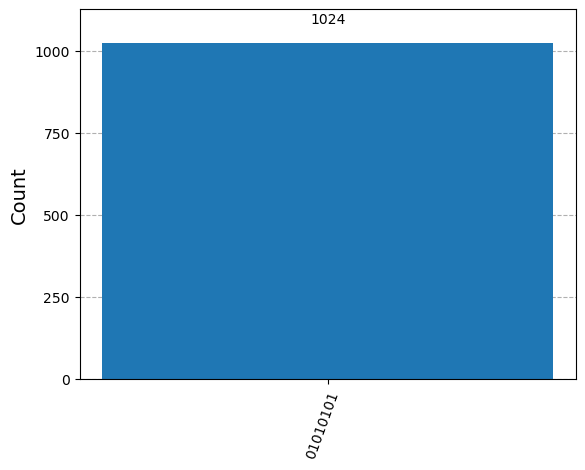

In [561]:
backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(qc1, backend), shots=1024).result()
print(result.get_counts(qc1))
plot_histogram(result.get_counts(qc1))

In [563]:
TT1

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 1, 1],
 [0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 1, 1, 0],
 [0, 0, 0, 1, 0, 1, 1, 1],
 [0, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 1],
 [0, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 0, 1, 1, 0, 1, 1],
 [0, 0, 0, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 1],
 [0, 0, 0, 1, 1, 1, 1, 0],
 [0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 0],
 

---------------------------------------

## S-box implementation using individual Boolean function

In [234]:
TT = []
for i in range(len(a)):
    TT.append([int(bit) for bit in a[i]])
mat = np.transpose(TT)

In [341]:
A = [[1,1], [0,1]]
B = [[1,1], [0,1]]

#np.array(np.tensordot(A, B, axes=0))
C = np.kron(np.matrix(A),np.matrix(B))
D = np.kron(np.matrix(C),np.matrix(C))
mob = np.kron(np.matrix(D),np.matrix(D))
mob

matrix([[1, 1, 1, ..., 1, 1, 1],
        [0, 1, 0, ..., 1, 0, 1],
        [0, 0, 1, ..., 0, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 1]])

In [238]:
output = np.dot(mat,mob)
output

matrix([[  0,   0,   0, ...,  64,  64, 128],
        [  0,   1,   1, ...,  64,  64, 128],
        [  1,   2,   1, ...,  64,  64, 128],
        ...,
        [  1,   1,   1, ...,  64,  64, 128],
        [  1,   2,   2, ...,  64,  64, 128],
        [  0,   0,   1, ...,  64,  64, 128]])

In [240]:
np.shape(output)

(8, 256)

In [242]:
f1 = np.array([item % 2 for item in output[0]])
f2 = np.array([item % 2 for item in output[1]])
f3 = np.array([item % 2 for item in output[2]])
f4 = np.array([item % 2 for item in output[3]])
f5 = np.array([item % 2 for item in output[4]])
f6 = np.array([item % 2 for item in output[5]])
f7 = np.array([item % 2 for item in output[6]])
f8 = np.array([item % 2 for item in output[7]])

In [244]:
np.array(f1).flatten()

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [246]:
lst = [f'{i:08b}' for i in range(256)]
Tab = []
for i in range(len(lst)):
    Tab.append([int(bit) for bit in lst[i]])

var = [f'x{i}' for i in range(8-1,-1,-1)]
var

['x7', 'x6', 'x5', 'x4', 'x3', 'x2', 'x1', 'x0']

In [248]:
# cnt=0
if f1.flatten()[0]==1:
    fun1 = ['1']
else: fun1 = []
for i in range(1,256):
    if f1.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
#         if len(index)==1:
#             cnt = cnt+1
        fun1.append(' AND '.join(index))
#print(fun1)
' XOR '.join(fun1)
# cnt

'x2 XOR x2 AND x1 XOR x3 AND x0 XOR x3 AND x2 XOR x3 AND x2 AND x1 XOR x4 AND x1 XOR x4 AND x1 AND x0 XOR x4 AND x2 AND x1 XOR x4 AND x3 XOR x4 AND x3 AND x1 XOR x4 AND x3 AND x1 AND x0 XOR x4 AND x3 AND x2 XOR x4 AND x3 AND x2 AND x0 XOR x4 AND x3 AND x2 AND x1 XOR x4 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x1 XOR x5 AND x3 XOR x5 AND x3 AND x0 XOR x5 AND x3 AND x1 XOR x5 AND x3 AND x1 AND x0 XOR x5 AND x3 AND x2 AND x0 XOR x5 AND x3 AND x2 AND x1 XOR x5 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x4 XOR x6 AND x1 XOR x6 AND x2 AND x1 XOR x6 AND x2 AND x1 AND x0 XOR x6 AND x3 XOR x6 AND x3 AND x1 XOR x6 AND x3 AND x2 XOR x6 AND x3 AND x2 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x4 XOR x6 AND x4 AND x1 XOR x6 AND x4 AND x1 AND x0 XOR x6 AND x4 AND x3 XOR x6 AND x4 AND x3 AND x1 XOR x6 AND x5 AND x1 XOR x6 AND x5 AND x1 AND x0 XOR x6 AND x5 AND x3 XOR x6 AND x5 AND x3 AND x1 XOR x7 XOR x7 AND x1 XOR x7 AND x1 AND x0 XOR x7 AND x2 AND x1 AND x0 XOR x7 AND x3 XOR x7 AND x3 AND x1 XOR x7 AN

In [250]:
if f2.flatten()[0]==1:
    fun2 = ['1']
else: fun2 = []
for i in range(1,256):
    if f2.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        fun2.append(' AND '.join(index))
' XOR '.join(fun2)

'x0 XOR x1 XOR x1 AND x0 XOR x2 XOR x2 AND x0 XOR x2 AND x1 AND x0 XOR x3 AND x1 AND x0 XOR x3 AND x2 XOR x3 AND x2 AND x1 AND x0 XOR x4 XOR x4 AND x1 XOR x4 AND x1 AND x0 XOR x4 AND x2 AND x1 XOR x4 AND x3 XOR x4 AND x3 AND x0 XOR x4 AND x3 AND x1 XOR x5 XOR x5 AND x0 XOR x5 AND x1 AND x0 XOR x5 AND x2 XOR x5 AND x2 AND x0 XOR x5 AND x2 AND x1 XOR x5 AND x3 AND x0 XOR x5 AND x3 AND x1 AND x0 XOR x5 AND x3 AND x2 AND x0 XOR x5 AND x3 AND x2 AND x1 XOR x5 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x4 XOR x6 XOR x6 AND x0 XOR x6 AND x1 AND x0 XOR x6 AND x2 XOR x6 AND x2 AND x0 XOR x6 AND x2 AND x1 XOR x6 AND x2 AND x1 AND x0 XOR x6 AND x3 AND x0 XOR x6 AND x3 AND x2 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x4 XOR x6 AND x5 XOR x6 AND x5 AND x1 XOR x6 AND x5 AND x1 AND x0 XOR x6 AND x5 AND x3 XOR x6 AND x5 AND x3 AND x1 XOR x7 AND x0 XOR x7 AND x1 XOR x7 AND x2 XOR x7 AND x2 AND x0 XOR x7 AND x3 XOR x7 AND x3 AND x1 XOR x7 AND x3 AND x2 XOR x7 AND x3 AN

In [252]:
#cnt=0
if f3.flatten()[0]==1:
    fun3 = ['1']
else: fun3 = []
for i in range(1,256):
    if f3.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        fun3.append(' AND '.join(index))
' XOR '.join(fun3)

'1 XOR x1 XOR x2 XOR x2 AND x0 XOR x2 AND x1 XOR x3 XOR x3 AND x1 XOR x3 AND x2 XOR x4 AND x0 XOR x4 AND x1 XOR x4 AND x1 AND x0 XOR x4 AND x2 XOR x4 AND x2 AND x0 XOR x4 AND x2 AND x1 XOR x4 AND x3 XOR x4 AND x3 AND x0 XOR x4 AND x3 AND x1 XOR x4 AND x3 AND x2 AND x1 AND x0 XOR x5 XOR x5 AND x1 XOR x5 AND x2 AND x1 AND x0 XOR x5 AND x3 XOR x5 AND x3 AND x0 XOR x5 AND x3 AND x1 XOR x5 AND x3 AND x1 AND x0 XOR x5 AND x3 AND x2 AND x0 XOR x5 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x0 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x2 AND x0 XOR x5 AND x4 AND x2 AND x1 XOR x6 AND x1 XOR x6 AND x2 AND x1 XOR x6 AND x2 AND x1 AND x0 XOR x6 AND x3 XOR x6 AND x3 AND x1 XOR x6 AND x3 AND x1 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x4 AND x0 XOR x6 AND x4 AND x2 XOR x6 AND x4 AND x2 AND x0 XOR x6 AND x4 AND x3 AND x0 XOR x6 AND x5 AND x1 XOR x6 AND x5 AND x3 XOR x6 AND x5 AND x3 AND x1 XOR x6 AND x5 AND x3 AND x2 XOR x6 AND x5 AND x4 XOR x7 AND x1 XOR x7 AND

In [254]:
if f4.flatten()[0]==1:
    fun4 = ['1']
else: fun4 = []
for i in range(1,256):
    if f4.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        fun4.append(' AND '.join(index))
' XOR '.join(fun4)

'1 XOR x1 AND x0 XOR x2 XOR x3 XOR x3 AND x0 XOR x3 AND x1 XOR x3 AND x2 XOR x3 AND x2 AND x1 XOR x4 AND x1 AND x0 XOR x4 AND x2 AND x0 XOR x4 AND x2 AND x1 AND x0 XOR x4 AND x3 XOR x4 AND x3 AND x1 XOR x4 AND x3 AND x1 AND x0 XOR x4 AND x3 AND x2 XOR x4 AND x3 AND x2 AND x0 XOR x4 AND x3 AND x2 AND x1 XOR x5 XOR x5 AND x2 XOR x5 AND x2 AND x1 XOR x5 AND x2 AND x1 AND x0 XOR x5 AND x3 AND x0 XOR x5 AND x3 AND x1 AND x0 XOR x5 AND x3 AND x2 AND x1 XOR x5 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x1 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x2 AND x1 XOR x5 AND x4 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x3 XOR x5 AND x4 AND x3 AND x1 XOR x6 AND x2 AND x1 XOR x6 AND x3 XOR x6 AND x3 AND x1 XOR x6 AND x3 AND x2 XOR x6 AND x3 AND x2 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x4 XOR x6 AND x4 AND x1 XOR x6 AND x4 AND x2 XOR x6 AND x4 AND x2 AND x1 XOR x6 AND x4 AND x2 AND x1 AND x0 XOR x6 AND x4 AND x3 XOR x6 AND x4 AND x3 AND x0 XOR x6 AND x4 AND x3 AND

In [256]:
if f5.flatten()[0]==1:
    fun5 = ['1']
else: fun5 = []
for i in range(1,256):
    if f5.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        fun5.append(' AND '.join(index))
' XOR '.join(fun5)

'1 XOR x0 XOR x2 AND x1 XOR x2 AND x1 AND x0 XOR x3 XOR x3 AND x0 XOR x3 AND x1 AND x0 XOR x3 AND x2 XOR x3 AND x2 AND x1 XOR x4 AND x0 XOR x4 AND x1 AND x0 XOR x4 AND x2 AND x1 XOR x4 AND x2 AND x1 AND x0 XOR x4 AND x3 XOR x4 AND x3 AND x0 XOR x4 AND x3 AND x2 XOR x4 AND x3 AND x2 AND x0 XOR x4 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x0 XOR x5 AND x1 XOR x5 AND x1 AND x0 XOR x5 AND x2 XOR x5 AND x2 AND x0 XOR x5 AND x2 AND x1 XOR x5 AND x3 XOR x5 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x1 XOR x5 AND x4 AND x1 AND x0 XOR x5 AND x4 AND x3 AND x1 XOR x5 AND x4 AND x3 AND x1 AND x0 XOR x5 AND x4 AND x3 AND x2 XOR x5 AND x4 AND x3 AND x2 AND x0 XOR x5 AND x4 AND x3 AND x2 AND x1 XOR x6 XOR x6 AND x1 AND x0 XOR x6 AND x2 XOR x6 AND x2 AND x0 XOR x6 AND x3 XOR x6 AND x3 AND x0 XOR x6 AND x3 AND x1 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x4 AND x0 XOR x6 AND x4 AND x1 XOR x6 AND x4 AND x2 AND x1 XOR x6 AND x4 AND x2 AND x1 AND x0 XOR x6 AND x4 AND x3 AND x0 XOR x6 AND x4 AND x3 AND x1 XOR

In [258]:
if f6.flatten()[0]==1:
    fun6 = ['1']
else: fun6 = []
for i in range(1,256):
    if f6.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        fun6.append(' AND '.join(index))
' XOR '.join(fun6)

'1 XOR x0 XOR x1 XOR x2 XOR x2 AND x0 XOR x2 AND x1 XOR x3 AND x1 XOR x3 AND x2 AND x1 AND x0 XOR x4 XOR x4 AND x0 XOR x4 AND x1 XOR x4 AND x2 AND x0 XOR x4 AND x2 AND x1 AND x0 XOR x4 AND x3 AND x0 XOR x4 AND x3 AND x1 AND x0 XOR x4 AND x3 AND x2 XOR x4 AND x3 AND x2 AND x0 XOR x4 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x0 XOR x5 AND x1 XOR x5 AND x1 AND x0 XOR x5 AND x2 XOR x5 AND x2 AND x0 XOR x5 AND x2 AND x1 AND x0 XOR x5 AND x3 AND x1 XOR x5 AND x3 AND x2 XOR x5 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x4 XOR x5 AND x4 AND x1 AND x0 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x3 AND x1 XOR x6 AND x0 XOR x6 AND x1 AND x0 XOR x6 AND x2 XOR x6 AND x2 AND x0 XOR x6 AND x2 AND x1 AND x0 XOR x6 AND x3 XOR x6 AND x3 AND x0 XOR x6 AND x3 AND x1 AND x0 XOR x6 AND x4 AND x1 XOR x6 AND x4 AND x1 AND x0 XOR x6 AND x4 AND x2 XOR x6 AND x4 AND x2 AND x1 XOR x6 AND x4 AND x2 AND x1 AND x0 XOR x6 AND x4 AND x3 AND x1 XOR x6 AND x4 AND x3 AND x1 AND x0 XOR x6 AND x5 XOR

In [260]:
if f7.flatten()[0]==1:
    fun7 = ['1']
else: fun7 = []
for i in range(1,256):
    if f7.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        fun7.append(' AND '.join(index))
' XOR '.join(fun7)

'1 XOR x2 AND x0 XOR x2 AND x1 XOR x3 XOR x3 AND x2 AND x0 XOR x3 AND x2 AND x1 XOR x3 AND x2 AND x1 AND x0 XOR x4 AND x1 XOR x4 AND x1 AND x0 XOR x4 AND x2 AND x1 AND x0 XOR x4 AND x3 AND x1 XOR x4 AND x3 AND x1 AND x0 XOR x4 AND x3 AND x2 AND x0 XOR x4 AND x3 AND x2 AND x1 XOR x5 XOR x5 AND x0 XOR x5 AND x1 AND x0 XOR x5 AND x2 AND x0 XOR x5 AND x2 AND x1 XOR x5 AND x3 XOR x5 AND x3 AND x2 XOR x5 AND x3 AND x2 AND x0 XOR x5 AND x3 AND x2 AND x1 XOR x5 AND x4 AND x0 XOR x5 AND x4 AND x1 XOR x5 AND x4 AND x1 AND x0 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x2 AND x1 XOR x5 AND x4 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x3 AND x1 XOR x5 AND x4 AND x3 AND x2 XOR x5 AND x4 AND x3 AND x2 AND x1 XOR x6 AND x0 XOR x6 AND x1 AND x0 XOR x6 AND x2 AND x0 XOR x6 AND x2 AND x1 XOR x6 AND x2 AND x1 AND x0 XOR x6 AND x3 XOR x6 AND x3 AND x1 AND x0 XOR x6 AND x3 AND x2 XOR x6 AND x3 AND x2 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x4 AND x0 XOR x6 AND x4 AND x1 XOR x6 AND x4 AND x1 AND x0 XOR x6 AND

In [262]:
if f8.flatten()[0]==1:
    fun8 = ['1']
else: fun8 = []
for i in range(1,256):
    if f8.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        fun8.append(' AND '.join(index))
' XOR '.join(fun8)

'x1 XOR x2 AND x1 XOR x2 AND x1 AND x0 XOR x3 AND x0 XOR x3 AND x1 XOR x3 AND x1 AND x0 XOR x3 AND x2 XOR x3 AND x2 AND x0 XOR x3 AND x2 AND x1 XOR x4 XOR x4 AND x1 XOR x4 AND x1 AND x0 XOR x4 AND x2 AND x1 AND x0 XOR x4 AND x3 XOR x4 AND x3 AND x1 XOR x4 AND x3 AND x2 XOR x4 AND x3 AND x2 AND x0 XOR x4 AND x3 AND x2 AND x1 XOR x5 XOR x5 AND x0 XOR x5 AND x2 XOR x5 AND x2 AND x0 XOR x5 AND x2 AND x1 XOR x5 AND x2 AND x1 AND x0 XOR x5 AND x3 AND x0 XOR x5 AND x3 AND x1 AND x0 XOR x5 AND x3 AND x2 AND x0 XOR x5 AND x4 XOR x5 AND x4 AND x0 XOR x5 AND x4 AND x1 XOR x5 AND x4 AND x1 AND x0 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x2 AND x0 XOR x5 AND x4 AND x2 AND x1 XOR x5 AND x4 AND x3 XOR x5 AND x4 AND x3 AND x1 XOR x6 AND x0 XOR x6 AND x1 XOR x6 AND x2 XOR x6 AND x2 AND x0 XOR x6 AND x2 AND x1 XOR x6 AND x2 AND x1 AND x0 XOR x6 AND x3 XOR x6 AND x3 AND x0 XOR x6 AND x3 AND x1 XOR x6 AND x3 AND x1 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x4 AND x0 XO

--------------------------------

In [397]:
TT1 = []
for i in range(len(b)):
    TT1.append([int(bit) for bit in b[i]])
mat1 = np.transpose(TT1)

In [399]:
output1 = np.dot(mat1,mob)
output1

matrix([[  0,   1,   0, ...,  63,  64, 128],
        [  1,   2,   2, ...,  63,  68, 128],
        [  0,   0,   1, ...,  71,  57, 128],
        ...,
        [  1,   1,   1, ...,  61,  60, 128],
        [  0,   1,   1, ...,  63,  65, 128],
        [  1,   1,   2, ...,  69,  61, 128]])

In [401]:
np.shape(output1)

(8, 256)

In [403]:
g1 = np.array([item % 2 for item in output1[0]])
g2 = np.array([item % 2 for item in output1[1]])
g3 = np.array([item % 2 for item in output1[2]])
g4 = np.array([item % 2 for item in output1[3]])
g5 = np.array([item % 2 for item in output1[4]])
g6 = np.array([item % 2 for item in output1[5]])
g7 = np.array([item % 2 for item in output1[6]])
g8 = np.array([item % 2 for item in output1[7]])

In [405]:
np.array(g1).flatten()

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

In [407]:
if g1.flatten()[0]==1:
    func1 = ['1']
else: func1 = []
for i in range(1,256):
    if g1.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        func1.append(' AND '.join(index))
' XOR '.join(func1)

'x0 XOR x1 AND x0 XOR x2 AND x1 AND x0 XOR x3 XOR x3 AND x1 AND x0 XOR x3 AND x2 XOR x3 AND x2 AND x1 XOR x3 AND x2 AND x1 AND x0 XOR x4 XOR x4 AND x0 XOR x4 AND x2 AND x0 XOR x4 AND x2 AND x1 XOR x4 AND x2 AND x1 AND x0 XOR x4 AND x3 XOR x4 AND x3 AND x1 XOR x4 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x0 XOR x5 AND x2 XOR x5 AND x2 AND x1 XOR x5 AND x3 XOR x5 AND x3 AND x1 XOR x5 AND x3 AND x2 XOR x5 AND x3 AND x2 AND x0 XOR x5 AND x4 XOR x5 AND x4 AND x2 AND x0 XOR x5 AND x4 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x3 XOR x5 AND x4 AND x3 AND x0 XOR x5 AND x4 AND x3 AND x1 XOR x5 AND x4 AND x3 AND x2 XOR x6 XOR x6 AND x1 XOR x6 AND x2 XOR x6 AND x2 AND x1 AND x0 XOR x6 AND x3 XOR x6 AND x3 AND x2 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x4 AND x0 XOR x6 AND x4 AND x1 XOR x6 AND x4 AND x1 AND x0 XOR x6 AND x4 AND x2 AND x0 XOR x6 AND x4 AND x2 AND x1 XOR x6 AND x4 AND x3 XOR x6 AND x4 AND x3 AND x2 AND x0 XOR x6 AND x4 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x5 XOR x6 AND x5 AND x2 XOR x6 AN

In [409]:
if g2.flatten()[0]==1:
    func2 = ['1']
else: func2 = []
for i in range(1,256):
    if g2.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        func2.append(' AND '.join(index))
' XOR '.join(func2)

'1 XOR x2 XOR x2 AND x0 XOR x2 AND x1 XOR x3 XOR x3 AND x1 XOR x3 AND x2 XOR x3 AND x2 AND x0 XOR x3 AND x2 AND x1 XOR x4 XOR x4 AND x0 XOR x4 AND x1 AND x0 XOR x4 AND x2 XOR x4 AND x2 AND x1 XOR x4 AND x2 AND x1 AND x0 XOR x4 AND x3 AND x1 AND x0 XOR x4 AND x3 AND x2 XOR x4 AND x3 AND x2 AND x0 XOR x4 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x0 XOR x5 AND x2 AND x0 XOR x5 AND x4 AND x1 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x3 XOR x5 AND x4 AND x3 AND x0 XOR x5 AND x4 AND x3 AND x2 XOR x5 AND x4 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x0 XOR x6 AND x1 XOR x6 AND x1 AND x0 XOR x6 AND x2 AND x0 XOR x6 AND x2 AND x1 XOR x6 AND x3 XOR x6 AND x3 AND x1 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x4 XOR x6 AND x4 AND x0 XOR x6 AND x4 AND x1 XOR x6 AND x4 AND x1 AND x0 XOR x6 AND x4 AND x2 XOR x6 AND x4 AND x2 AND x1 XOR x6 AND x4 AND x2 AND x1 AND x0 XOR x6 AND x4 AND x3 AND x1 XOR x6 AND x4 AND x3 AND x2 XOR x6 AND x5 XOR x6 AND x5 AND x0 XOR x6 AND x5 AND

In [411]:
if g3.flatten()[0]==1:
    func3 = ['1']
else: func3 = []
for i in range(1,256):
    if g3.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        func3.append(' AND '.join(index))
' XOR '.join(func3)

'x1 XOR x2 XOR x2 AND x0 XOR x2 AND x1 AND x0 XOR x3 AND x0 XOR x3 AND x1 XOR x3 AND x1 AND x0 XOR x4 AND x1 XOR x4 AND x2 AND x1 XOR x4 AND x3 XOR x4 AND x3 AND x0 XOR x4 AND x3 AND x2 AND x1 XOR x5 AND x0 XOR x5 AND x2 XOR x5 AND x2 AND x1 XOR x5 AND x3 AND x0 XOR x5 AND x3 AND x1 AND x0 XOR x5 AND x3 AND x2 AND x0 XOR x5 AND x3 AND x2 AND x1 XOR x5 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x4 XOR x5 AND x4 AND x0 XOR x5 AND x4 AND x1 XOR x5 AND x4 AND x1 AND x0 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x3 XOR x5 AND x4 AND x3 AND x0 XOR x5 AND x4 AND x3 AND x2 AND x0 XOR x5 AND x4 AND x3 AND x2 AND x1 XOR x5 AND x4 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x0 XOR x6 AND x1 XOR x6 AND x1 AND x0 XOR x6 AND x2 AND x0 XOR x6 AND x2 AND x1 XOR x6 AND x2 AND x1 AND x0 XOR x6 AND x3 XOR x6 AND x3 AND x1 AND x0 XOR x6 AND x3 AND x2 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x4 XOR x6 AND x4 AND x2 AND x0 XOR x6 AND x4 AND x2 AND x1 AND x0 XOR x6 AND x4 AND x3 XOR x6 AN

In [413]:
if g4.flatten()[0]==1:
    func4 = ['1']
else: func4 = []
for i in range(1,256):
    if g4.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        func4.append(' AND '.join(index))
' XOR '.join(func4)

'1 XOR x0 XOR x1 XOR x2 AND x1 AND x0 XOR x3 AND x0 XOR x3 AND x1 XOR x3 AND x2 XOR x3 AND x2 AND x1 XOR x3 AND x2 AND x1 AND x0 XOR x4 XOR x4 AND x0 XOR x4 AND x1 AND x0 XOR x4 AND x2 AND x0 XOR x4 AND x3 AND x0 XOR x4 AND x3 AND x1 XOR x4 AND x3 AND x1 AND x0 XOR x4 AND x3 AND x2 XOR x4 AND x3 AND x2 AND x1 XOR x5 XOR x5 AND x0 XOR x5 AND x1 XOR x5 AND x1 AND x0 XOR x5 AND x2 AND x0 XOR x5 AND x3 XOR x5 AND x3 AND x0 XOR x5 AND x3 AND x1 AND x0 XOR x5 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x0 XOR x5 AND x4 AND x1 AND x0 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x2 AND x1 XOR x5 AND x4 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x3 AND x0 XOR x5 AND x4 AND x3 AND x1 XOR x5 AND x4 AND x3 AND x1 AND x0 XOR x5 AND x4 AND x3 AND x2 XOR x5 AND x4 AND x3 AND x2 AND x0 XOR x5 AND x4 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x1 XOR x6 AND x2 AND x1 XOR x6 AND x3 AND x0 XOR x6 AND x3 AND x1 XOR x6 AND x3 AND x1 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x4 XOR

In [415]:
if g5.flatten()[0]==1:
    func5 = ['1']
else: func5 = []
for i in range(1,256):
    if g5.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        func5.append(' AND '.join(index))
' XOR '.join(func5)

'x2 XOR x2 AND x1 XOR x3 XOR x3 AND x2 XOR x3 AND x2 AND x1 XOR x3 AND x2 AND x1 AND x0 XOR x4 XOR x4 AND x0 XOR x4 AND x1 XOR x4 AND x2 AND x1 AND x0 XOR x4 AND x3 AND x1 XOR x4 AND x3 AND x1 AND x0 XOR x4 AND x3 AND x2 AND x1 XOR x4 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x1 XOR x5 AND x1 AND x0 XOR x5 AND x2 XOR x5 AND x2 AND x0 XOR x5 AND x2 AND x1 AND x0 XOR x5 AND x3 XOR x5 AND x3 AND x1 XOR x5 AND x3 AND x1 AND x0 XOR x5 AND x3 AND x2 AND x0 XOR x5 AND x3 AND x2 AND x1 XOR x5 AND x4 AND x1 XOR x5 AND x4 AND x1 AND x0 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x2 AND x0 XOR x5 AND x4 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x3 XOR x5 AND x4 AND x3 AND x0 XOR x5 AND x4 AND x3 AND x2 XOR x5 AND x4 AND x3 AND x2 AND x0 XOR x6 XOR x6 AND x0 XOR x6 AND x1 XOR x6 AND x1 AND x0 XOR x6 AND x2 AND x1 AND x0 XOR x6 AND x3 AND x0 XOR x6 AND x3 AND x1 XOR x6 AND x3 AND x2 XOR x6 AND x3 AND x2 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x4 XOR x6 AND x4 AND x0 XOR x6 AND x4 AND x1 AND x0 XOR x6 AN

In [417]:
if g6.flatten()[0]==1:
    func6 = ['1']
else: func6 = []
for i in range(1,256):
    if g6.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        func6.append(' AND '.join(index))
' XOR '.join(func6)

'1 XOR x0 XOR x1 XOR x1 AND x0 XOR x2 XOR x2 AND x0 XOR x2 AND x1 AND x0 XOR x3 AND x0 XOR x3 AND x1 AND x0 XOR x3 AND x2 AND x0 XOR x3 AND x2 AND x1 AND x0 XOR x4 AND x0 XOR x4 AND x1 XOR x4 AND x1 AND x0 XOR x4 AND x2 XOR x4 AND x2 AND x1 XOR x4 AND x3 XOR x4 AND x3 AND x0 XOR x4 AND x3 AND x1 XOR x4 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x0 XOR x5 AND x2 AND x0 XOR x5 AND x3 XOR x5 AND x3 AND x1 AND x0 XOR x5 AND x3 AND x2 XOR x5 AND x3 AND x2 AND x1 XOR x5 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x4 XOR x5 AND x4 AND x1 XOR x5 AND x4 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x3 AND x1 XOR x5 AND x4 AND x3 AND x1 AND x0 XOR x5 AND x4 AND x3 AND x2 XOR x5 AND x4 AND x3 AND x2 AND x1 XOR x6 AND x1 AND x0 XOR x6 AND x2 XOR x6 AND x2 AND x0 XOR x6 AND x2 AND x1 AND x0 XOR x6 AND x3 AND x1 AND x0 XOR x6 AND x3 AND x2 XOR x6 AND x4 AND x2 XOR x6 AND x4 AND x2 AND x1 XOR x6 AND x4 AND x2 AND x1 AND x0 XOR x6 AND x4 AND x3 XOR x6 AND x4 AND x3 AND x0 XOR x6 AND x4 AND x3 AND x1 XOR x6 AND x4 AND

In [419]:
if g7.flatten()[0]==1:
    func7 = ['1']
else: func7 = []
for i in range(1,256):
    if g7.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        func7.append(' AND '.join(index))
' XOR '.join(func7)

'x0 XOR x1 XOR x2 XOR x2 AND x1 XOR x2 AND x1 AND x0 XOR x3 XOR x3 AND x1 XOR x3 AND x1 AND x0 XOR x3 AND x2 AND x1 XOR x4 AND x0 XOR x4 AND x1 XOR x4 AND x2 AND x1 XOR x4 AND x3 AND x0 XOR x4 AND x3 AND x1 XOR x4 AND x3 AND x2 AND x0 XOR x4 AND x3 AND x2 AND x1 XOR x4 AND x3 AND x2 AND x1 AND x0 XOR x5 AND x1 XOR x5 AND x2 XOR x5 AND x2 AND x0 XOR x5 AND x2 AND x1 XOR x5 AND x3 XOR x5 AND x3 AND x2 XOR x5 AND x3 AND x2 AND x0 XOR x5 AND x4 XOR x5 AND x4 AND x0 XOR x5 AND x4 AND x1 XOR x5 AND x4 AND x1 AND x0 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x2 AND x1 AND x0 XOR x5 AND x4 AND x3 AND x1 AND x0 XOR x5 AND x4 AND x3 AND x2 AND x0 XOR x5 AND x4 AND x3 AND x2 AND x1 XOR x5 AND x4 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x0 XOR x6 AND x1 XOR x6 AND x1 AND x0 XOR x6 AND x2 AND x0 XOR x6 AND x3 AND x1 XOR x6 AND x3 AND x2 AND x0 XOR x6 AND x4 XOR x6 AND x4 AND x1 AND x0 XOR x6 AND x4 AND x2 AND x0 XOR x6 AND x4 AND x2 AND x1 XOR x6 AND x4 AND x3 XOR x6 AND x4 AND x3 AND x1 AND x0 XOR x6 AN

In [421]:
if g8.flatten()[0]==1:
    func8 = ['1']
else: func8 = []
for i in range(1,256):
    if g8.flatten()[i]==1:
        index = []
        for j in range(8):
            if Tab[i][j]==1:
                index.append(var[j])
        func8.append(' AND '.join(index))
' XOR '.join(func8)

'1 XOR x0 XOR x1 AND x0 XOR x2 AND x1 AND x0 XOR x3 AND x1 XOR x3 AND x1 AND x0 XOR x3 AND x2 AND x1 XOR x4 XOR x4 AND x2 AND x0 XOR x4 AND x2 AND x1 XOR x4 AND x2 AND x1 AND x0 XOR x4 AND x3 XOR x4 AND x3 AND x1 AND x0 XOR x4 AND x3 AND x2 XOR x4 AND x3 AND x2 AND x0 XOR x4 AND x3 AND x2 AND x1 XOR x5 XOR x5 AND x0 XOR x5 AND x1 AND x0 XOR x5 AND x2 XOR x5 AND x3 AND x1 XOR x5 AND x3 AND x2 AND x1 XOR x5 AND x4 XOR x5 AND x4 AND x0 XOR x5 AND x4 AND x1 AND x0 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x2 AND x0 XOR x5 AND x4 AND x3 XOR x5 AND x4 AND x3 AND x0 XOR x5 AND x4 AND x3 AND x1 XOR x6 AND x1 AND x0 XOR x6 AND x2 XOR x6 AND x2 AND x1 XOR x6 AND x3 XOR x6 AND x3 AND x1 XOR x6 AND x3 AND x1 AND x0 XOR x6 AND x3 AND x2 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x4 XOR x6 AND x4 AND x1 XOR x6 AND x4 AND x1 AND x0 XOR x6 AND x4 AND x2 AND x0 XOR x6 AND x4 AND x2 AND x1 XOR x6 AND x4 AND x3 AND x1 XOR x6 AND x4 AND x3 AND x2 XOR x6 AND x5 XOR x6 AND x5 AND x1 XOR x6 AND x5 AND x1 AND

--------------------------

### ANF to qiskit circuit implementation

In [523]:
from qiskit import QuantumCircuit

def parse_anf(anf, num_vars):
    terms = anf.split(" XOR ")
    parsed_terms = []
    for term in terms:
        variables = []
        if " AND " in term:
            for var in term.split(" AND "):
                variables.append(int(var[1:]))
        else:
            variables.append(int(term[1:]))
        parsed_terms.append(variables)
    return parsed_terms

def anf_to_qiskit_circuit(anf, num_vars):
    cnt =0
    parsed_terms = parse_anf(anf, num_vars)
    qc = QuantumCircuit(num_vars + 1,1)  # Extra qubit for the output
    # qc.x(2)
    # qc.x(3)
    # qc.x(4)
    # qc.x(5)
    
    for term in parsed_terms:
        if len(term) == 1:
            qc.cx(term[0], num_vars)  # Apply CNOT for single variable term
        elif len(term) > 1:
            # Apply multi-controlled Toffoli gate for AND terms
            qc.mcx(term, num_vars)  # Apply multi-controlled Toffoli gate
            if len(term)==7:
                cnt = cnt +1
    print(cnt)        
    return qc

anf ="x0 XOR x1 AND x0 XOR x2 AND x1 AND x0 XOR x3 AND x1 XOR x3 AND x1 AND x0 XOR x3 AND x2 AND x1 XOR x4 XOR x4 AND x2 AND x0 XOR x4 AND x2 AND x1 XOR x4 AND x2 AND x1 AND x0 XOR x4 AND x3 XOR x4 AND x3 AND x1 AND x0 XOR x4 AND x3 AND x2 XOR x4 AND x3 AND x2 AND x0 XOR x4 AND x3 AND x2 AND x1 XOR x5 XOR x5 AND x0 XOR x5 AND x1 AND x0 XOR x5 AND x2 XOR x5 AND x3 AND x1 XOR x5 AND x3 AND x2 AND x1 XOR x5 AND x4 XOR x5 AND x4 AND x0 XOR x5 AND x4 AND x1 AND x0 XOR x5 AND x4 AND x2 XOR x5 AND x4 AND x2 AND x0 XOR x5 AND x4 AND x3 XOR x5 AND x4 AND x3 AND x0 XOR x5 AND x4 AND x3 AND x1 XOR x6 AND x1 AND x0 XOR x6 AND x2 XOR x6 AND x2 AND x1 XOR x6 AND x3 XOR x6 AND x3 AND x1 XOR x6 AND x3 AND x1 AND x0 XOR x6 AND x3 AND x2 AND x0 XOR x6 AND x3 AND x2 AND x1 XOR x6 AND x4 XOR x6 AND x4 AND x1 XOR x6 AND x4 AND x1 AND x0 XOR x6 AND x4 AND x2 AND x0 XOR x6 AND x4 AND x2 AND x1 XOR x6 AND x4 AND x3 AND x1 XOR x6 AND x4 AND x3 AND x2 XOR x6 AND x5 XOR x6 AND x5 AND x1 XOR x6 AND x5 AND x1 AND x0 XOR x6 AND x5 AND x2 AND x0 XOR x6 AND x5 AND x3 XOR x6 AND x5 AND x3 AND x1 AND x0 XOR x6 AND x5 AND x3 AND x2 AND x1 XOR x6 AND x5 AND x3 AND x2 AND x1 AND x0 XOR x6 AND x5 AND x4 AND x2 AND x1 XOR x6 AND x5 AND x4 AND x3 AND x0 XOR x6 AND x5 AND x4 AND x3 AND x1 AND x0 XOR x6 AND x5 AND x4 AND x3 AND x2 AND x0 XOR x7 AND x0 XOR x7 AND x1 XOR x7 AND x1 AND x0 XOR x7 AND x2 AND x1 AND x0 XOR x7 AND x3 AND x0 XOR x7 AND x3 AND x1 XOR x7 AND x3 AND x1 AND x0 XOR x7 AND x3 AND x2 AND x1 AND x0 XOR x7 AND x4 XOR x7 AND x4 AND x1 XOR x7 AND x4 AND x2 XOR x7 AND x4 AND x2 AND x1 XOR x7 AND x4 AND x2 AND x1 AND x0 XOR x7 AND x4 AND x3 AND x1 XOR x7 AND x4 AND x3 AND x1 AND x0 XOR x7 AND x5 XOR x7 AND x5 AND x1 XOR x7 AND x5 AND x1 AND x0 XOR x7 AND x5 AND x2 AND x0 XOR x7 AND x5 AND x2 AND x1 XOR x7 AND x5 AND x2 AND x1 AND x0 XOR x7 AND x5 AND x3 XOR x7 AND x5 AND x3 AND x0 XOR x7 AND x5 AND x3 AND x2 XOR x7 AND x5 AND x3 AND x2 AND x1 XOR x7 AND x5 AND x3 AND x2 AND x1 AND x0 XOR x7 AND x5 AND x4 AND x0 XOR x7 AND x5 AND x4 AND x1 AND x0 XOR x7 AND x5 AND x4 AND x2 AND x1 XOR x7 AND x5 AND x4 AND x3 XOR x7 AND x5 AND x4 AND x3 AND x2 XOR x7 AND x5 AND x4 AND x3 AND x2 AND x0 XOR x7 AND x5 AND x4 AND x3 AND x2 AND x1 XOR x7 AND x5 AND x4 AND x3 AND x2 AND x1 AND x0 XOR x7 AND x6 AND x2 AND x0 XOR x7 AND x6 AND x3 XOR x7 AND x6 AND x3 AND x1 XOR x7 AND x6 AND x3 AND x2 AND x1 XOR x7 AND x6 AND x4 AND x1 XOR x7 AND x6 AND x4 AND x2 XOR x7 AND x6 AND x4 AND x2 AND x0 XOR x7 AND x6 AND x4 AND x2 AND x1 XOR x7 AND x6 AND x4 AND x2 AND x1 AND x0 XOR x7 AND x6 AND x4 AND x3 XOR x7 AND x6 AND x4 AND x3 AND x1 XOR x7 AND x6 AND x4 AND x3 AND x1 AND x0 XOR x7 AND x6 AND x4 AND x3 AND x2 XOR x7 AND x6 AND x4 AND x3 AND x2 AND x0 XOR x7 AND x6 AND x5 AND x1 XOR x7 AND x6 AND x5 AND x1 AND x0 XOR x7 AND x6 AND x5 AND x2 XOR x7 AND x6 AND x5 AND x2 AND x1 XOR x7 AND x6 AND x5 AND x3 XOR x7 AND x6 AND x5 AND x3 AND x1 XOR x7 AND x6 AND x5 AND x3 AND x2 XOR x7 AND x6 AND x5 AND x3 AND x2 AND x1 XOR x7 AND x6 AND x5 AND x4 AND x0 XOR x7 AND x6 AND x5 AND x4 AND x2 XOR x7 AND x6 AND x5 AND x4 AND x2 AND x0 XOR x7 AND x6 AND x5 AND x4 AND x2 AND x1 XOR x7 AND x6 AND x5 AND x4 AND x2 AND x1 AND x0 XOR x7 AND x6 AND x5 AND x4 AND x3 XOR x7 AND x6 AND x5 AND x4 AND x3 AND x0 XOR x7 AND x6 AND x5 AND x4 AND x3 AND x1 XOR x7 AND x6 AND x5 AND x4 AND x3 AND x2 XOR x7 AND x6 AND x5 AND x4 AND x3 AND x2 AND x0 XOR x7 AND x6 AND x5 AND x4 AND x3 AND x2 AND x1"
num_vars = 8  # Number of variables (x7, x6, x5, x4, x3, x2, x1, x0)
qc = anf_to_qiskit_circuit(anf, num_vars)
qc.measure(range(8,9),range(1))
qc.draw(fold=-1)

4


q_0: ──■────■────■─────────■──────────────■─────────■─────────■─────────■──────────────■────■────────────────────────■────■─────────■─────────■─────────■────────────────────────■────■───────────────────■────■─────────────────────────────■────■─────────■─────────■─────────■────■────■────■─────────■────■────■─────────■────■────────────────────────■─────────■──────────────■────■─────────■─────────■──────────────■────■────■───────────────────■─────────■────■─────────────────────────────■─────────■──────────────■─────────■─────────■──────────────────────────────────■─────────■─────────■─────────■──────────────■──────────
       │    │    │         │              │         │         │         │              │    │                        │    │         │         │         │                        │    │                   │    │                             │    │         │         │         │    │    │    │         │    │    │         │    │                        │         │              │    │         │         │              │    │    │                   │         │    │                             │         │              │         │         │                                  │         │         │         │              │          
q_1: ──┼────■────■────■────■────■─────────┼────■────■─────────■─────────┼────■─────────┼────■─────────■────■─────────┼────■─────────┼─────────┼────■────■─────────■─────────■────■────┼────■─────────■────■────┼────■────■──────────────■────■────┼─────────■────■────■────■────┼────■────┼────┼────■────■────■────┼────■────■────■─────────■─────────■────■────■────■─────────■────■────┼────■────■─────────┼─────────■────■────┼────■────■──────────────┼────■────■────┼─────────■────■────■─────────┼────■────■─────────■────■─────────┼────■────■─────────■─────────■─────────■────┼─────────┼────■────■─────────┼────■─────────┼────■─────
       │    │    │    │    │    │         │    │    │         │         │    │         │    │         │    │         │    │         │         │    │    │         │         │    │    │    │         │    │    │    │    │              │    │    │         │    │    │    │    │    │    │    │    │    │    │    │    │    │    │         │         │    │    │    │         │    │    │    │    │         │         │    │    │    │    │              │    │    │    │         │    │    │         │    │    │         │    │         │    │    │         │         │         │    │         │    │    │         │    │         │    │     
q_2: ──┼────┼────■────┼────┼────■─────────■────■────■─────────┼────■────■────■─────────┼────┼────■────┼────■─────────┼────┼────■────■─────────┼────┼────┼────■────■─────────┼────┼────■────■─────────┼────┼────■────■────┼────■─────────┼────┼────■─────────┼────■────■────■────┼────┼────■────┼────┼────┼────■────┼────┼────┼────■─────────┼────■────■────■────┼────┼─────────┼────┼────■────■────■─────────┼────■────■────■────┼────┼────■─────────■────■────■────■────■─────────┼────■────┼────■────■────■────■─────────┼────┼────■────■────┼────┼────■────■─────────┼────■────■────┼────■────■────■────■─────────┼────┼────■────■────■─────
       │    │    │    │    │    │         │    │    │         │    │    │    │         │    │    │    │    │         │    │    │    │         │    │    │    │    │         │    │    │    │         │    │    │    │    │    │         │    │    │         │    │    │    │    │    │    │    │    │    │    │    │    │    │    │         │    │    │    │    │    │         │    │    │    │    │         │    │    │    │    │    │    │         │    │    │    │    │         │    │    │    │    │    │    │         │    │    │    │    │    │    │    │         │    │    │    │    │    │    │    │         │    │    │    │    │     
q_3: ──┼────┼────┼────■────■────■─────────┼────┼────┼────■────■────■────■────■─────────┼────┼────┼────■────■─────────┼────┼────┼────┼────■────■────■────┼────┼────┼────■────■────■────■────■─────────┼────┼────┼────┼────■────■─────────┼────┼────┼────■────■───

In [513]:
print(dict(qc.count_ops()))

{'mcx': 106, 'ccx': 14, 'cx': 3, 'measure': 1}


In [377]:
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(qc, backend)).result()
print(result.get_counts(qc))
#plot_histogram(result.get_counts(qc))

{'0': 1024}


----------------------------------------

## Toy-ZUC implementation and keystream generation

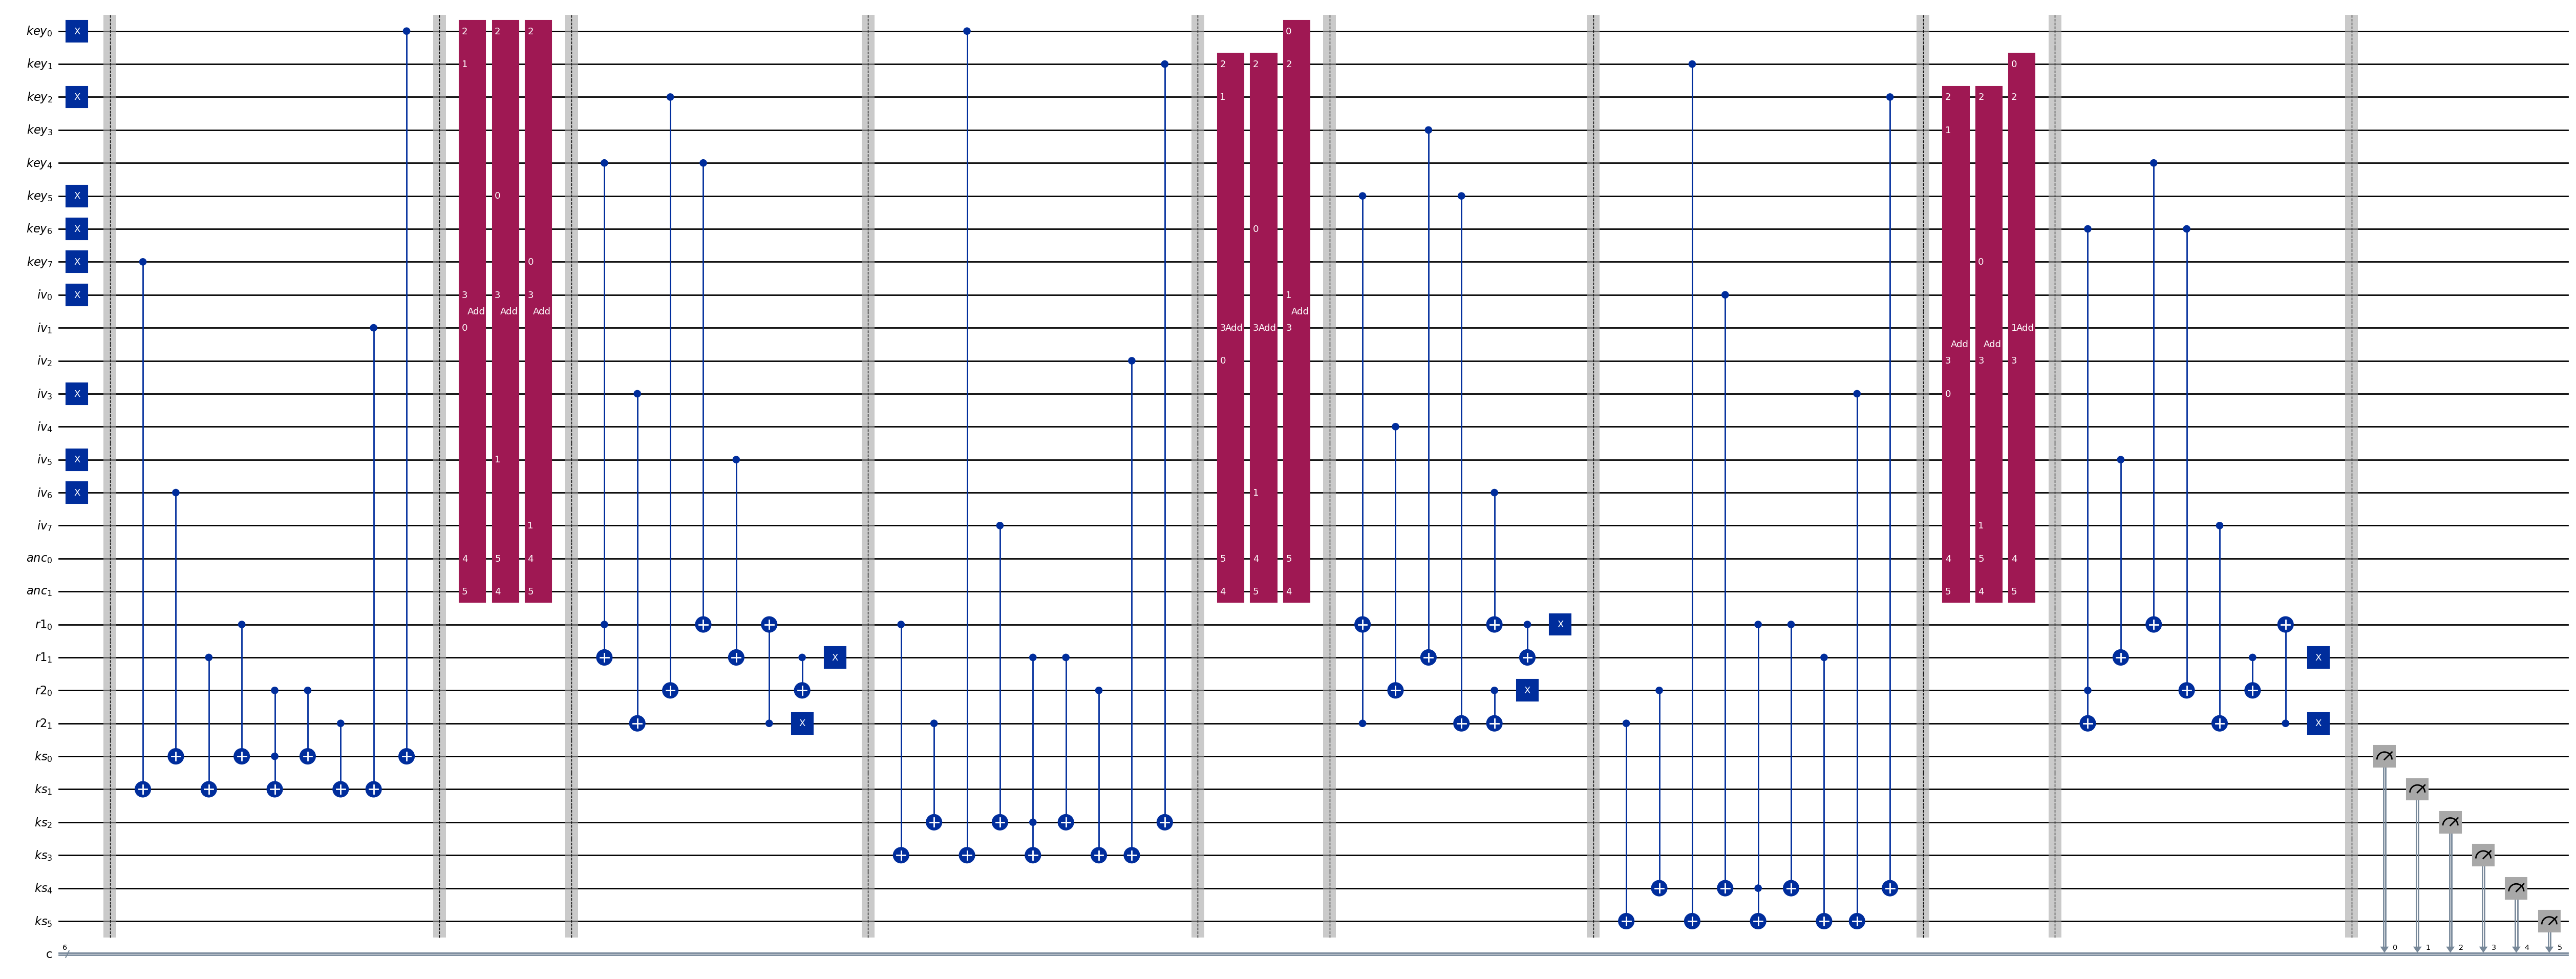

In [292]:
from qiskit import *

# Defining Addition mod (2^2-1) circuit for the LFSR
def addmod3():
    """
    Create a quantum circuit for add mod(3) and convert it to a gate.

    Returns:
    Gate: A custom 6-qubit gate.
    """
    qc = QuantumCircuit(6, name="Add")
    
    # implementing addition: qubits are in order: a1,a0,b1,b0, anc[0], anc[1]
    qc.cx(0,2)
    qc.cx(0,4)
    qc.cx(0,5)
    qc.ccx(3,1,4)
    qc.ccx(4,2,5)
    qc.cx(4,2)
    qc.ccx(3,1,4)
    qc.cx(1,3)
    qc.cx(0,4)
    qc.cx(0,2)
    
    # Convert the quantum circuit to a gate
    add = qc.to_gate()
    return add


# main_circuit
key = QuantumRegister(8, 'key')
iv = QuantumRegister(8, 'iv')   # IV has been set to the known value 01101001
anc = QuantumRegister(2, 'anc') # Ancilla qubits to perform LFSR operations
r1 = QuantumRegister(2, 'r1') # initialized as 00
r2 = QuantumRegister(2, 'r2') # initialized as 00
ks = QuantumRegister(6, 'ks') 
c = ClassicalRegister(6, 'c')

zuc = QuantumCircuit(key, iv, anc, r1, r2, ks, c)

# Key initialization - all possible key
zuc.x(key[0])
zuc.x(key[2])
zuc.x(key[5])
zuc.x(key[6])
zuc.x(key[7])
# zuc.h(key)

# IV initialization, # IV = iv7 iv6 ... iv0 = 10010110
zuc.x(iv[0])
zuc.x(iv[3])
zuc.x(iv[5])
zuc.x(iv[6])

# Create the custom addition gate
custom_gate = addmod3()
zuc.barrier()

## ----------------------------------- ##
# 1st round keystream generation, W[1]W[0] = ks[1]ks[0]

# R1 \oplus X0
zuc.cx(key[7],ks[1]) # S_{7H} --> W[1]
zuc.cx(r1[1],ks[1]) # R1[1] --> W[1]
zuc.cx(iv[6],ks[0]) # S_{6L} --> W[0]
zuc.cx(r1[0],ks[0]) # R1[0] --> W[0]

# Add mod 2^2 to R2[1]R2[0] in-place ks[1]ks[0]
zuc.ccx(r2[0],ks[0],ks[1])
zuc.cx(r2[0],ks[0])
zuc.cx(r2[1],ks[1])

# XOR with S_{1L} S_{0H} to ks[1] ks[0]
zuc.cx(iv[1],ks[1]) # S_{1L} = iv[1]
zuc.cx(key[0],ks[0]) # S_{0H} = key[0]
zuc.barrier()

## ----------------------------------- ##
'''
s_i = (k_i || iv_i) - We do not allocate separate memory location for the LFSR.
LFSR update function: s_8 = s_7 + s_5 + 2s_1 + s_0 mod (2^2 - 1)
'''
# --- LFSR update in-place to S_0: key[0]||iv[0] --- #
# incoming carry: (IC), Qubit storing MSB will be used as IC for following addition
zuc.append(custom_gate, [iv[1],key[1],key[0],iv[0],anc[0],anc[1]]) # anc[0] = 0 (IC), anc[1]: stores MSB, s1 = key[1] || iv[1], 2s1 = iv[1] || key[1]
zuc.append(custom_gate, [key[5],iv[5],key[0],iv[0],anc[1],anc[0]]) # anc[1]: IC, anc[0]: stores MSB, s5 = key[5] || iv[5]
zuc.append(custom_gate, [key[7],iv[7],key[0],iv[0],anc[0],anc[1]]) # anc[0]: IC, anc[1]: stores MSB. s7 = key[7] || iv[7]
# S_0 --> S_7, and 0<i<8, S_i --> S_{i-1}
zuc.barrier()

# --- R1, R2 update --- #
# R1 Add mod 2^2 X1: b1 b0 = r1[1]r1[0], a[1] = S_{5L} = iv[5], a[0] = S_{4H} = key[4]
zuc.ccx(key[4],r1[0],r1[1]) #b1 =\XOR a0 b0
zuc.cx(key[4],r1[0]) # S_{4H} = key[4], b0 =\XOR a0
zuc.cx(iv[5],r1[1]) # S_{5L} = iv[5], b1 =\XOR a1
# W_{1H}=r1[1], W_{1L}=r1[0]

# R2 \XOR X2 = S_{3L}=iv[3] || S_{2H}=key[2]:
zuc.cx(iv[3],r2[1])
zuc.cx(key[2],r2[0])
# W_{2H}=r2[1], W_{2L}=r2[0]

# L(W_{1L}||W_{2H}) = W_{2H}|| W_{1L} = r2[1] || r1[0], S(r2[1] || r1[0]) = updated R1
# L(W_{2L}||W_{1H}) = W_{1H}|| W_{2L} = r1[1] || r2[0], S(r1[1] || r2[0]) = updated R2

# implementing S(r2[1] || r1[0])
zuc.cx(r2[1],r1[0])
zuc.x(r2[1])
# Updated R1[1]R1[0] = r1[0] || r2[1]

# implementing S(r1[1] || r2[0])
zuc.cx(r1[1],r2[0])
zuc.x(r1[1])
# Updated R2[1]R2[0] = r2[0] || r1[1]
zuc.barrier()

# 2nd round keystream generation, W[1]W[0] = ks[3]ks[2]
# R1 \oplus X0
zuc.cx(r1[0],ks[3]) # R1[1] --> W[1]
zuc.cx(key[0],ks[3]) # S_{7H} = key[0]
zuc.cx(r2[1],ks[2]) # R1[0] --> W[0]
zuc.cx(iv[7],ks[2]) # S_{6L} = iv[7]

# Add mod 2^2 to R2[1]R2[0] in-place ks[3]ks[2]
zuc.ccx(r1[1],ks[2],ks[3])
zuc.cx(r1[1],ks[2])
zuc.cx(r2[0],ks[3])

# XOR with S_{1L} S_{0H} to ks[3] ks[2]
zuc.cx(iv[2],ks[3]) # S_{1L} = iv[2]
zuc.cx(key[1],ks[2]) # S_{0H} = key[1]
zuc.barrier()

### ----------------------------------------- ##
'''
s_i = (k_i || iv_i) - We do not allocate separate memory location for the LFSR.
LFSR update function: s_8 = s_7 + s_5 + 2s_1 + s_0 mod (2^2 - 1)
'''
# --- LFSR update in-place to S_1 (new S_0): key[1]||iv[1] --- #
# incoming carry: (IC), Qubit storing MSB will be used as IC for following addition
zuc.append(custom_gate, [iv[2],key[2],key[1],iv[1],anc[1],anc[0]]) # anc[1] = 0 (IC), anc[0]: stores MSB, s1 = key[2] || iv[2], 2s1 = iv[2] || key[2]
zuc.append(custom_gate, [key[6],iv[6],key[1],iv[1],anc[0],anc[1]]) # anc[0]: IC, anc[1]: stores MSB, s5 = key[6] || iv[6]
zuc.append(custom_gate, [key[0],iv[0],key[1],iv[1],anc[1],anc[0]]) # anc[1]: IC, anc[0]: stores MSB. s7 = key[0] || iv[0]
# S_1 --> S_7, and 0<i<8, S_i --> S_{i-2 mod 8}
zuc.barrier()

# --- R1, R2 update --- # 
# Updated R1[1]R1[0] = r1[0] || r2[1]
# R1 Add mod 2^2 X1: b1 b0 = r1[0]r2[1], a[1] = S_{5L} = iv[6], a[0] = S_{4H} = key[5]
zuc.ccx(key[5],r2[1],r1[0]) #b1 =\XOR a0 b0
zuc.cx(key[5],r2[1]) # S_{4H} = key[5], b0 =\XOR a0
zuc.cx(iv[6],r1[0]) # S_{5L} = iv[6], b1 =\XOR a1
# W_{1H}=r1[0], W_{1L}=r2[1]

# R2 \XOR X2 = S_{3L}=iv[4] || S_{2H}=key[3]:
# Updated R2[1]R2[0] = r2[0] || r1[1]
zuc.cx(iv[4],r2[0])
zuc.cx(key[3],r1[1])
# W_{2H}=r2[0], W_{2L}=r1[1]

# L(W_{1L}||W_{2H}) = W_{2H}|| W_{1L} = r2[0] || r2[1], updated R1 = S(r2[0] || r2[1])
# L(W_{2L}||W_{1H}) = W_{1H}|| W_{2L} = r1[0] || r1[1], updated R2 = S(r1[0] || r1[1])

# implementing S(r2[0] || r2[1])
zuc.cx(r2[0],r2[1])
zuc.x(r2[0])
# Updated R1[1]R1[0] = r2[1] || r2[0]

# implementing S(r1[0] || r1[1])
zuc.cx(r1[0],r1[1])
zuc.x(r1[0])
# Updated R2[1]R2[0] = r1[1] || r1[0]
zuc.barrier()

# 3rd round keystream generation, W[1]W[0] = ks[5]ks[4]
# R1 \oplus X0
zuc.cx(r2[1],ks[5]) # R1[1] --> W[1]
zuc.cx(key[1],ks[5]) # S_{7H} = key[1]
zuc.cx(r2[0],ks[4]) # R1[0] --> W[0]
zuc.cx(iv[0],ks[4]) # S_{6L} = iv[0]

# Add mod 2^2 to R2[1]R2[0] in-place ks[5]ks[4], a1a0= R2[1]R2[0]
zuc.ccx(r1[0],ks[4],ks[5])
zuc.cx(r1[0],ks[4])
zuc.cx(r1[1],ks[5])

# XOR with S_{1L} S_{0H} to ks[5] ks[4]
zuc.cx(iv[3],ks[5]) # S_{1L} = iv[3]
zuc.cx(key[2],ks[4]) # S_{0H} = key[2]
zuc.barrier()

### ----------------------------------------- ##
'''
s_i = (k_i || iv_i) - We do not allocate separate memory location for the LFSR.
LFSR update function: s_8 = s_7 + s_5 + 2s_1 + s_0 mod (2^2 - 1)
'''
# --- LFSR update in-place to S_2 (new S_0): key[2]||iv[2] --- #
# incoming carry: (IC), Qubit storing MSB will be used as IC for following addition
zuc.append(custom_gate, [iv[3],key[3],key[2],iv[2],anc[0],anc[1]]) # anc[0] = 0 (IC), anc[1]: stores MSB, s1 = key[3] || iv[3], 2s1 = iv[3] || key[3]
zuc.append(custom_gate, [key[7],iv[7],key[2],iv[2],anc[1],anc[0]]) # anc[1]: IC, anc[0]: stores MSB, s5 = key[7] || iv[7]
zuc.append(custom_gate, [key[1],iv[1],key[2],iv[2],anc[0],anc[1]]) # anc[0]: IC, anc[1]: stores MSB. s7 = key[1] || iv[1]
# S_2 --> S_7, and 0<i<8, S_i --> S_{i-3 mod 8}
zuc.barrier()

# --- R1, R2 update --- # 
# Updated R1[1]R1[0] = r2[1] || r2[0]
# R1 Add mod 2^2 X1: b1 b0 = r2[1]r2[0], a[1] = S_{5L} = iv[7], a[0] = S_{4H} = key[6]
zuc.ccx(key[6],r2[0],r2[1]) #b1 =\XOR a0 b0
zuc.cx(key[6],r2[0]) # S_{4H} = key[6], b0 =\XOR a0
zuc.cx(iv[7],r2[1]) # S_{5L} = iv[7], b1 =\XOR a1
# W_{1H}=r2[1], W_{1L}=r2[0]

# R2 \XOR X2 = S_{3L}=iv[5] || S_{2H}=key[4]:
# Updated R2[1]R2[0] = r1[1] || r1[0]
zuc.cx(iv[5],r1[1])
zuc.cx(key[4],r1[0])
# W_{2H}=r1[1], W_{2L}=r1[0]

# L(W_{1L}||W_{2H}) = W_{2H}|| W_{1L} = r1[1] || r2[0], updated R1 = S(r1[1] || r2[0])
# L(W_{2L}||W_{1H}) = W_{1H}|| W_{2L} = r2[1] || r1[0], updated R2 = S(r2[1] || r1[0])

# implementing S(r1[1] || r2[0])
zuc.cx(r1[1],r2[0])
zuc.x(r1[1])
# Updated R1[1]R1[0] = r2[0] || r1[1]

# implementing S(r2[1] || r1[0])
zuc.cx(r2[1],r1[0])
zuc.x(r2[1])
# Updated R2[1]R2[0] = r1[0] || r2[1]
zuc.barrier()

# # 3rd round keystream generation, W[1]W[0] = ks[7]ks[6]
# # R1 \oplus X0
# zuc.cx(r2[0],ks[7]) # R1[1] --> W[1]
# zuc.cx(key[2],ks[7]) # S_{7H} = key[2]
# zuc.cx(r1[1],ks[6]) # R1[0] --> W[0]
# zuc.cx(iv[1],ks[6]) # S_{6L} = iv[1]

# # Add mod 2^2 to R2[1]R2[0] in-place ks[7]ks[6], a1a0= R2[1]R2[0]
# zuc.ccx(r2[1],ks[6],ks[7])
# zuc.cx(r2[1],ks[6])
# zuc.cx(r1[0],ks[7])

# # XOR with S_{1L} S_{0H} to ks[7] ks[6]
# zuc.cx(iv[4],ks[7]) # S_{1L} = iv[4]
# zuc.cx(key[3],ks[6]) # S_{0H} = key[3]
# zuc.barrier()

### ------------------------------- ###

zuc.measure(ks,c) # Measuring the keystram bits
zuc.draw(output='mpl',fold=-1)

{'010010': 1024}


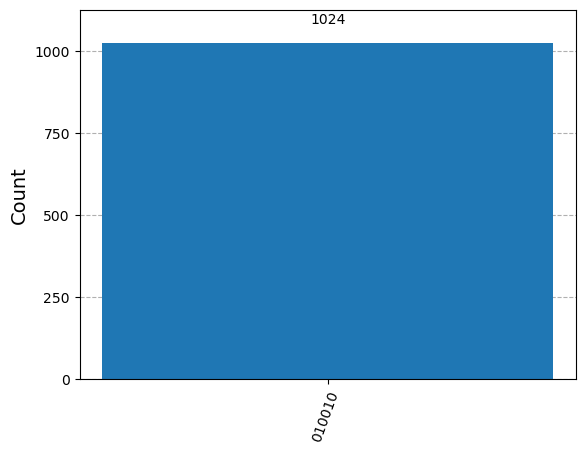

In [294]:
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(zuc, backend)).result()
print(result.get_counts(zuc))
plot_histogram(result.get_counts(zuc))

In [296]:
print(dict(zuc.count_ops()))

{'cx': 42, 'x': 15, 'barrier': 10, 'Add': 9, 'ccx': 6, 'measure': 6}


----------------------------------------

-----------------------------------------